In [ ]:
!pip install yfinance

In [ ]:
pip install pymannkendall

[*********************100%%**********************]  1 of 1 completed


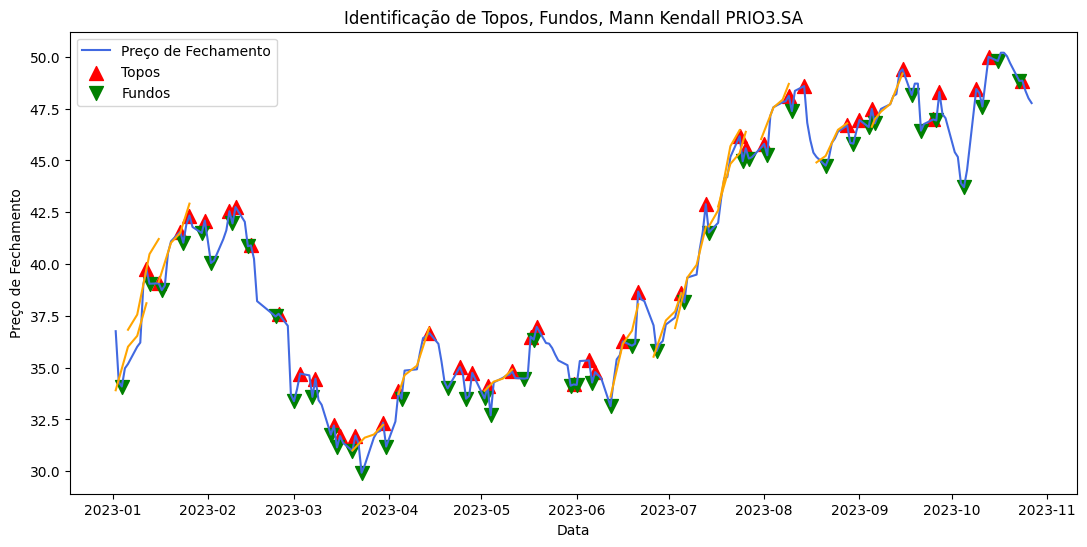

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymannkendall as mk

# Define o ticker da ação e o período desejado
ticker = "PRIO3.SA"


start_date = "2023-01-02"
end_date = "2023-10-30"

# Obtenha os dados da ação utilizando a biblioteca yfinance
#data = yf.download(ticker, start=start_date, end=end_date,period=period)

data = yf.download(ticker, start=start_date, end=end_date)
df = data

# Encontra os topos (máximos) e fundos (mínimos)
data['local_max'] = data['Close'][
  (data['Close'].shift(1) < data['Close']) &
  (data['Close'].shift(-1) < data['Close'])]

data['data'] = data.index

listaTodosValores = data['Close'].tolist()
listaTodosValoresData = data['data'].tolist()
listaTopos = data['local_max'].tolist()

data['local_min'] = data['Close'][
  (data['Close'].shift(1) > data['Close']) &
  (data['Close'].shift(-1) > data['Close'])]

listaFundos = data['local_min'].tolist()

# Lista para armazenar os valores dos topos em tendência de alta
valores_topos_tendencia_alta = []

# Lista para armazenar as posições dos topos em tendência de alta em relação à lista de todos os topos
posicoes_topos_tendencia_alta = []


# Plot dos preços de fechamento com topos e fundos destacados
plt.figure(figsize=(13, 6))
plt.plot(data.index, data['Close'], label='Preço de Fechamento', color='royalblue')
plt.scatter(data.index, data['local_max'], s=100, label='Topos', marker='^', color='red')
plt.scatter(data.index, data['local_min'], s=100, label='Fundos', marker='v', color='green')

# Calcular e plotar a regressão  para os 10 dias anteriores a cada topo
for i, top_date in enumerate(data['local_max'].dropna().index):
    if top_date - pd.DateOffset(days=10) >= data.index[0]:
        start_date = top_date - pd.DateOffset(days=10)
        end_date = top_date
        subset = data[start_date:end_date]
        x = np.arange(len(subset))
        trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(subset['Close'])
        y_pred =  intercept + slope * x


        if trend == 'increasing' and p <0.05 and s >=0:
            tendencia = "Tendencia de alta"
            posicoes_topos_tendencia_alta.append(listaTopos.index(subset['local_max'].iloc[-1]))  # Armazena a posição do topo em tendência de alta
            valores_topos_tendencia_alta.append(subset['Close'].iloc[-1])  # Armazena o valor do topo em tendência de alta
            plt.plot(subset.index, y_pred, color='orange', linestyle='-')
        elif trend == 'decreasing' :
            tendencia = "Tendência de Baixa"

        else:
            tendencia = "Sem Tendência"

        #plt.plot(subset.index, y_pred, color='orange', linestyle='-')


plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title(f'Identificação de Topos, Fundos, Mann Kendall {ticker}')
plt.legend()
plt.show()



In [ ]:
# Calcular e imprimir os resultados tendência para cada topo
for i, top_date in enumerate(data['local_max'].dropna().index):
    if top_date - pd.DateOffset(days=10) >= data.index[0]:
        start_date = top_date - pd.DateOffset(days=10)
        end_date = top_date
        subset = data[start_date:end_date]
        trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(subset['Close'])

        if trend == 'increasing':
            tendencia = "Tendência de Alta"
        elif trend == 'decreasing':
            tendencia = "Tendência de Baixa"
        else:
            tendencia = "Sem Tendência"

        print(f"Topo {i + 1}:")
        print(f"Data do Topo: {top_date}")
        print(f"Trend: {trend}")
        print(f"Significancia: {h}")
        print(f"valor de p: {p}")
        print(f"valor de s: {s}")
        print(f"Tendência: {tendencia}\n")

if not valores_topos_tendencia_alta:
    print("Não foram encontrados topos em tendência de alta.")
else:
    print("Valores dos topos em tendência de alta:", valores_topos_tendencia_alta)

Topo 1:
Data do Topo: 2023-01-12 00:00:00
Trend: increasing
Significancia: True
valor de p: 0.028567681801513034
valor de s: 22.0
Tendência: Tendência de Alta

Topo 2:
Data do Topo: 2023-01-16 00:00:00
Trend: increasing
Significancia: True
valor de p: 0.016260936780450264
valor de s: 17.0
Tendência: Tendência de Alta

Topo 3:
Data do Topo: 2023-01-23 00:00:00
Trend: no trend
Significancia: False
valor de p: 0.07150541644487451
valor de s: 13.0
Tendência: Sem Tendência

Topo 4:
Data do Topo: 2023-01-26 00:00:00
Trend: increasing
Significancia: True
valor de p: 0.004878564475033542
valor de s: 28.0
Tendência: Tendência de Alta

Topo 5:
Data do Topo: 2023-01-31 00:00:00
Trend: no trend
Significancia: False
valor de p: 0.5480055723613093
valor de s: 5.0
Tendência: Sem Tendência

Topo 6:
Data do Topo: 2023-02-08 00:00:00
Trend: no trend
Significancia: False
valor de p: 0.536186771900174
valor de s: 6.0
Tendência: Sem Tendência

Topo 7:
Data do Topo: 2023-02-10 00:00:00
Trend: no trend
Signi

In [ ]:
print(posicoes_topos_tendencia_alta)
print(valores_topos_tendencia_alta)

[8, 10, 18, 61, 71, 88, 116, 126, 132, 139, 141, 151, 164, 177]
[39.75, 39.06999969482422, 42.34000015258789, 32.349998474121094, 36.68000030517578, 34.81999969482422, 38.66999816894531, 38.619998931884766, 42.88999938964844, 46.16999816894531, 45.59000015258789, 48.119998931884766, 46.689998626708984, 49.400001525878906]


In [ ]:
#(listaFundos)

indiceDataFundos=[]
indice=0
valoresFundo=[]
for i in listaFundos:
  if (not(np.isnan(i))):
     #print(i)
     valoresFundo.append(i)
     indiceDataFundos.append(indice)
  indice+=1

print(indiceDataFundos)
print(valoresFundo)
print(listaTodosValores)
print(listaTodosValoresData)

[2, 9, 11, 16, 20, 23, 28, 31, 36, 40, 44, 48, 50, 53, 56, 62, 65, 75, 78, 81, 83, 90, 93, 101, 103, 106, 109, 114, 120, 127, 133, 140, 142, 146, 152, 159, 166, 169, 171, 178, 181, 184, 191, 195, 197, 202]
[34.09000015258789, 39.04999923706055, 38.7400016784668, 41.029998779296875, 41.5, 40.04999923706055, 41.959999084472656, 40.86000061035156, 37.470001220703125, 33.380001068115234, 33.59000015258789, 31.770000457763672, 31.149999618530273, 30.989999771118164, 29.93000030517578, 31.190000534057617, 33.5, 34.0, 33.5, 33.52000045776367, 32.70000076293945, 34.470001220703125, 36.349998474121094, 34.130001068115234, 34.16999816894531, 34.279998779296875, 33.13999938964844, 36.060001373291016, 35.79999923706055, 38.150001525878906, 41.52000045776367, 44.959999084472656, 45.09000015258789, 45.25, 47.380001068115234, 44.75, 45.810001373291016, 46.61000061035156, 46.790000915527344, 48.15999984741211, 46.439998626708984, 46.93000030517578, 43.709999084472656, 47.599998474121094, 49.7999992370

In [ ]:
# Selecionar os Fundos referente ao Topo anterior
def selecionar_proximo_fundo(indices, indice_anterior):
    indice_fundo_proximoTopoAnterior = None

    for indice in indices:
        if indice > indice_anterior:
            indice_fundo_proximoTopoAnterior = indice
            break

    return indice_fundo_proximoTopoAnterior

# Exemplo de uso:
lista_indices = indiceDataFundos


indices_referencia = posicoes_topos_tendencia_alta
indice_fundo_proximoTopoAnterior_lista = []

for indice_referencia in indices_referencia:
    indice_fundo_proximoTopoAnterior = selecionar_proximo_fundo(lista_indices, indice_referencia)
    indice_fundo_proximoTopoAnterior_lista.append(indice_fundo_proximoTopoAnterior)
    indice_fundo_proximoTopoAnterior_lista = list(filter(lambda x: x is not None, indice_fundo_proximoTopoAnterior_lista))
print("Lista do Indice do fundo_proximoTopoAnterior:", indice_fundo_proximoTopoAnterior_lista)


Lista do Indice do fundo_proximoTopoAnterior: [9, 11, 20, 62, 75, 90, 120, 127, 133, 140, 142, 152, 166, 178]


In [ ]:
#Seelcionar valores de acordo com o indice dos fundos selecionados referente ao topo anterior
def selecionar_valores_por_indices(lista, indices):
    valores_indice_proximotopo = [lista[indice] for indice in indices]
    return valores_indice_proximotopo

# Exemplo de uso:
minha_lista = listaTodosValores
meus_indices = indice_fundo_proximoTopoAnterior_lista

valores_indice_proximotopo = selecionar_valores_por_indices(minha_lista, meus_indices)
print("Valores selecionados:", valores_indice_proximotopo)


Valores selecionados: [39.04999923706055, 38.7400016784668, 41.5, 31.190000534057617, 34.0, 34.470001220703125, 35.79999923706055, 38.150001525878906, 41.52000045776367, 44.959999084472656, 45.09000015258789, 47.380001068115234, 45.810001373291016, 48.15999984741211]


In [ ]:
# taxa_venda_aumento 15% padrão
# taxa_venda_baixa 5% padrão

def stock_buy_sell(taxa_venda_aumento = 0.15, taxa_venda_baixa = 0.05):
  valor_especulado = 100

  for indice, valor_topo, valor_fundo in zip(posicoes_topos_tendencia_alta, valores_topos_tendencia_alta,valores_indice_proximotopo ):

    valor_especulado = valor_especulado
    comprou = False
    vendeu = False
    valor_compra = 0
    valor_venda = 0
    retorno = 0
    qtd_ações = 0
    print("\n\n","="*20, "Topo Referência", indice, "="*20)

    zip_lists = zip(listaTodosValoresData, listaTodosValores)

    for timestamp, valor_atual in list(zip_lists)[indice+1:]:

      # ato de comprar
      if not comprou and valor_atual > valor_topo:
        comprou = True
        valor_compra = valor_topo
        distancia = valor_atual - valor_fundo
        porcentagem = (distancia / valor_fundo)
        #Especulação compra
        qtd_ações = valor_especulado/valor_compra
        valor_especulado = qtd_ações*valor_compra
        print("Data da Compra = ", timestamp)
        print("Valor da Ação no Ato da Compra = R$ ",round( valor_compra, 2))
        print("Porcentagem da distância do rompimento em relação ao fundo: {:.2f}%".format(porcentagem))


      # ato de vender
      # se valor subiu acima 3x a porcentagem do fundo ou abaixou abaixo 1x  a porcentagem do fundo anterior, venda ação
      if comprou and (valor_atual >= valor_compra+(valor_compra*porcentagem*3) or valor_atual < valor_fundo*(1-porcentagem)):
          valor_venda = valor_atual
          # especulação venda
          valor_especulado = qtd_ações*valor_venda
          print("Data da Venda = ", timestamp)
          print("Valor da Ação no Ato da Venda= R$ ", round(valor_venda, 2))
          #print("Rendimentos = R$ ", round(valor_venda - valor_compra, 2))
          print("Retorno Total do Capital Inicial Investido = R$ ",round(valor_especulado, 2))


          vendeu = True
          # interrompendo iteração atual, pois venda e compra da referencia atual foram realizadas
          break

    if not comprou:
      print("Compra não realizada. Ações não ultrapassaram ou se equipararam a valor referência")
    if not vendeu:
      #print("Venda não realizada. Ações não subiram mais de", str(int(taxa_venda_aumento*100))+"%", "nem reduziram abaixo de", str(int(taxa_venda_baixa*100))+"%")
      print("Venda não realizada. Ações não ultrapassaram ou se equipararam a valor referência")

In [ ]:
stock_buy_sell() # estratégia: venda acima 3x a porcentagem ou abaixou abaixo 1x a porcentagem



 ==================== Topo Referência 8 ====================
Data da Compra =  2023-01-19 00:00:00
Valor da Ação no Ato da Compra = R$  39.75
Porcentagem da distância do rompimento em relação ao fundo: 0.04%
Data da Venda =  2023-02-23 00:00:00
Valor da Ação no Ato da Venda= R$  37.47
Retorno Total do Capital Inicial Investido = R$  94.26


 ==================== Topo Referência 10 ====================
Data da Compra =  2023-01-19 00:00:00
Valor da Ação no Ato da Compra = R$  39.07
Porcentagem da distância do rompimento em relação ao fundo: 0.05%
Data da Venda =  2023-02-28 00:00:00
Valor da Ação no Ato da Venda= R$  33.7
Retorno Total do Capital Inicial Investido = R$  81.31


 ==================== Topo Referência 18 ====================
Data da Compra =  2023-02-08 00:00:00
Valor da Ação no Ato da Compra = R$  42.34
Porcentagem da distância do rompimento em relação ao fundo: 0.03%
Data da Venda =  2023-02-16 00:00:00
Valor da Ação no Ato da Venda= R$  40.25
Retorno Total do Capital 

In [ ]:
# Selecionando o primeiro valor
primeiro_valor = df['Close'].iloc[0]

# Selecionando o último valor
ultimo_valor = df['Close'].iloc[-1]

# Resultado
qtd_ações = 100/primeiro_valor
valor = qtd_ações*ultimo_valor



print("Primeiro valor:", round(primeiro_valor, 2))
print("Último valor:", round(ultimo_valor, 2))
print("Resultado Final:", round(valor, 2))

Primeiro valor: 36.76
Último valor: 47.77
Resultado Final: 129.95
